# Numismatic Distribution in Imperial Roman Africa Shown Through Social Network Analysis

## Abstract

Brief summary of the whole study (around 60-120 words), summarising the salient parts of the sections below.

## Context

The context includes: the general field (e.g., literature, history, archaeology, tourism, biology, forensics, religious studies); the specific application (e.g., literary analysis, quantitative history, genetics, virology, forensics intelligence, tourism planning, biblical quantitative studies).

## Problem and Motivation

What are the problems you want to address? Why are those problems important (impact, theoretical and/ or practical needs, etc.)? What are the main contributions of the project?

## Datasets

How did you gather the data? Did you digitise it? How? Is the material publicly available? What tools did you use:
1. to handle (store, manipulate) the data and 
2. to compute measures on the data?

## Validity and Reliability

How closely does the model of your dataset represent reality (validity)?
How consistent is the model you assembled (reliability)?

## Results

What is the connection among: the gathered data, the applied measures, and the properties found?

## Critique

Do you think your work solves the problem presented above? To which extent (completely, what parts)? Why? What could you have done differently to answer your research problems (e.g., gather data with additional information, build your model differently, apply alternative measures)?

## Data Analysis

### Importing

In [3]:
import pandas as pd
from collections import Counter

data_frame = pd.read_csv('isaw-papers-13-data.csv')
data_frame

,Catalogue,Region,Findspot,Province,Type,Denomination,Weight,Year_min,Year_max,Mint_Year,Circulation,Terminal_date,Mint
0,1,Africa,Gafsa,Proconsularis,hoard,sestertius,21.07,104,111,108.0,152.0,259,Rome
1,2,Africa,Gafsa,Proconsularis,hoard,sestertius,21.11,116,117,117.0,143.0,259,Rome
2,3,Africa,Gafsa,Proconsularis,hoard,sestertius,23.27,116,117,117.0,143.0,259,Rome
3,4,Africa,Gafsa,Proconsularis,hoard,sestertius,25.42,119,138,129.0,131.0,259,Rome
4,5,Africa,Gafsa,Proconsularis,hoard,sestertius,21.81,119,138,129.0,131.0,259,Rome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50965,50966,Africa,Segermes,Proconsularis,sitefind,antoninianus,1.46,270,270,270.0,NaN,NaN,Rome
50966,50967,Africa,Segermes,Proconsularis,sitefind,antoninianus,2.09,270,270,270.0,NaN,NaN,Rome
50967,50968,Africa,Segermes,Proconsularis,sitefind,antoninianus,2.57,270,275,272.5,NaN,NaN,Tripoli
50968,50969,Africa,Segermes,Proconsularis,sitefind,antoninianus,1.46,260,268,264.0,NaN,NaN,Rome


### Exploring and Cleaning: an iterative process

To some extent, I already know what type of data can be found in the dataset and what I want to focus my attention on. For this reason, before analyzing any further, I can exclude some columns and type of data from the dataset, so that I can work on a restricted and on point set.

For example, I will check the Region, the findspot and the denomination to see if there are any empty/NAN/unknown spots and then retain only **Region=Africa**, **findspot=hoard** and **exclude** any denomination of **imitation coins**. Moreover, the timespan the I want to consider is **23 BCE-275 CE**.

In [2]:
Counter(data_frame['Region'])

Counter({'Africa': 35559, 'Gaul': 13587, 'Spain': 1207, 'Britain': 617})

In [3]:
Counter(data_frame['Type'])

Counter({'hoard': 49759, 'sitefind': 1211})

What I can immediately do is retrieve only the data that has as **Region=Africa** and **findspot=hoard**.

In [4]:
df_africa = data_frame[(data_frame['Region'] == 'Africa') & (data_frame['Type'] == 'hoard')]
df_africa

,Catalogue,Region,Findspot,Province,Type,Denomination,Weight,Year_min,Year_max,Mint_Year,Circulation,Terminal_date,Mint
0,1,Africa,Gafsa,Proconsularis,hoard,sestertius,21.07,104,111,108.0,152.0,259,Rome
1,2,Africa,Gafsa,Proconsularis,hoard,sestertius,21.11,116,117,117.0,143.0,259,Rome
2,3,Africa,Gafsa,Proconsularis,hoard,sestertius,23.27,116,117,117.0,143.0,259,Rome
3,4,Africa,Gafsa,Proconsularis,hoard,sestertius,25.42,119,138,129.0,131.0,259,Rome
4,5,Africa,Gafsa,Proconsularis,hoard,sestertius,21.81,119,138,129.0,131.0,259,Rome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50955,50956,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy
50956,50957,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy
50957,50958,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy
50958,50959,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy


For more clarity, I can delete all the columns that will not be useful for my research.

In [5]:
df_africa = df_africa.drop(['Region','Type', 'Weight', 'Year_min', 'Year_max', 'Circulation', 'Terminal_date'], axis=1)
df_africa

,Catalogue,Findspot,Province,Denomination,Mint_Year,Mint
0,1,Gafsa,Proconsularis,sestertius,108.0,Rome
1,2,Gafsa,Proconsularis,sestertius,117.0,Rome
2,3,Gafsa,Proconsularis,sestertius,117.0,Rome
3,4,Gafsa,Proconsularis,sestertius,129.0,Rome
4,5,Gafsa,Proconsularis,sestertius,129.0,Rome
...,...,...,...,...,...,...
50955,50956,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50956,50957,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50957,50958,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50958,50959,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy


Checking Denominations, I notice that there are “imitation antoninianus” that I need to exclude.

In [6]:
Counter(df_africa['Denomination'])

Counter({'sestertius': 8045,
         'dupondius': 1,
         'denarius': 4603,
         'aureus': 38,
         'as': 4,
         'dupondius/as': 1,
         'antoninianus': 19680,
         'imitation antoninianus': 2012})

In [7]:
df_africa = df_africa[df_africa['Denomination'] != 'imitation antoninianus']
df_africa

,Catalogue,Findspot,Province,Denomination,Mint_Year,Mint
0,1,Gafsa,Proconsularis,sestertius,108.0,Rome
1,2,Gafsa,Proconsularis,sestertius,117.0,Rome
2,3,Gafsa,Proconsularis,sestertius,117.0,Rome
3,4,Gafsa,Proconsularis,sestertius,129.0,Rome
4,5,Gafsa,Proconsularis,sestertius,129.0,Rome
...,...,...,...,...,...,...
50955,50956,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50956,50957,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50957,50958,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50958,50959,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy


For sure, I can also exclude some coins minted before or after the time span of interest.

In [8]:
df_africa = df_africa[(df_africa['Mint_Year'] >= -23) & (df_africa['Mint_Year'] <= 275)]
df_africa

,Catalogue,Findspot,Province,Denomination,Mint_Year,Mint
0,1,Gafsa,Proconsularis,sestertius,108.0,Rome
1,2,Gafsa,Proconsularis,sestertius,117.0,Rome
2,3,Gafsa,Proconsularis,sestertius,117.0,Rome
3,4,Gafsa,Proconsularis,sestertius,129.0,Rome
4,5,Gafsa,Proconsularis,sestertius,129.0,Rome
...,...,...,...,...,...,...
50955,50956,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50956,50957,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50957,50958,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50958,50959,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy


In [9]:
df_africa.info() # Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32292 entries, 0 to 50959
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Catalogue     32292 non-null  int64  
 1   Findspot      32292 non-null  object 
 2   Province      32292 non-null  object 
 3   Denomination  32292 non-null  object 
 4   Mint_Year     32292 non-null  float64
 5   Mint          32292 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ MB


Each column has the correct type, no need for fixes.

In [10]:
df_africa.count() # Returns the number of non-null values in each DataFrame: rows should be 32372

Catalogue       32292
Findspot        32292
Province        32292
Denomination    32292
Mint_Year       32292
Mint            32292
dtype: int64

In [11]:
Counter(df_africa['Findspot'])

Counter({'Gafsa': 133,
         'Guelma': 4896,
         'Rusguniae': 547,
         'Monastir': 201,
         'Lambaesa': 6,
         'Volubilis -bracelet bourse': 104,
         'Volubilis - Palais Gordien': 68,
         'Banasa - Boulangerie': 491,
         'Banasa - Maison Fonteius ': 6,
         'Banasa -9 HS found (1954)': 9,
         'Banasa - Maison Diplome': 33,
         'Banasa -north baths': 14,
         'Ain Temouchent': 267,
         'Hadrumetum': 601,
         'El-Hamadi': 830,
         'Ain Bessem': 26,
         'Ain el Djenan': 21,
         'Albulae': 13,
         'Albulae (2)': 197,
         'Albulae (3)': 45,
         'Ain Trab': 61,
         'Alger-Hammamet': 21,
         'Alger-Ra•s Hamidou': 71,
         'Thibilis': 506,
         'Bou Isma•l': 5,
         'Bouira': 10,
         'Cherchel': 47,
         'Cherchel (2)': 501,
         'Cherchel (3)': 121,
         'Auzia': 5,
         'Cissi': 50,
         'Cissi (2)': 80,
         'Grarem': 226,
         'Aquae Calidae

Since the detail of the single archaeological excavation in a Findspot is not of my interest, I proceed to clean the data with the OpenRefine software in order to unify similar Findposts.

In [25]:
df_africa.to_csv('refined_dataset.csv', index=False)

The result is a new dataset, which I transform back into a dataframe, and which contains this number of Findspots:

In [52]:
df_africa = pd.read_csv('cleaned_dataset.csv', encoding='utf-8 ')
print(df_africa['Findspot'].value_counts())

Guelma                4896
Fadhiline             4636
Thysdrus              4004
Abbiar-Miggi          3952
Miliana               2855
Hadrumetum            1697
Gasr Selim             877
El-Hamadi              830
Cartennas              744
Banasa                 687
Cherchel               669
Rusguniae              547
Thibilis               506
Bou Arreridj           481
Auzia                  379
Rusicade               338
Utica                  330
Iomnium                329
Tripoli                287
Garian                 282
Adjim                  274
Ain Temouchent         267
Albulae                255
Grarem                 226
Khemis el Khema        225
Aquae Calidae          202
Monastir               201
Tipasa                 190
Volubilis              172
Gafsa                  133
Cissi                  130
Gadiaufala              81
Alger-Rais Hamidou      71
Lambaesa                61
Ain Trab                61
Gunugu                  51
Taher                   51
R

### Detect Outliers???

<AxesSubplot:>

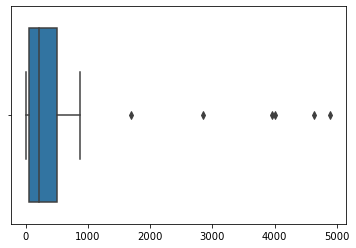

In [7]:
import seaborn as sns
sns.boxplot(x=df_africa['Findspot'].value_counts().tolist())

### Split data

Three historical periods: 
1. 23 BCE- 96 CE
2. 97-192 CE
3. 193-275 CE

In [107]:
df_africa1 = df_africa[df_africa['Mint_Year'] < 97]
df_africa2 = df_africa[(df_africa['Mint_Year'] > 96) & (df_africa['Mint_Year'] < 193)]
df_africa3 = df_africa[df_africa['Mint_Year'] > 192]

In [164]:
def new_csv(data_frame, file_name):
    '''
    drop csv file
    '''
    return data_frame.to_csv(file_name, index=False)

In [165]:
def den_per_prov_count(data_frame):
    '''
    how many coins of each denomination per findspot, return new df
    '''
    find = data_frame['Findspot'].unique()
    den = data_frame['Denomination'].unique()
    new_d = {'Site': find.tolist()}
    for d in den.tolist():
        new_d[d] = 0
    new_df = pd.DataFrame(data=new_d)
    for f in find:
        for idn in data_frame.index:
            if data_frame['Findspot'][idn] == f:
                denomination = data_frame['Denomination'][idn]
                idx = new_df.index[new_df['Site'] == f].values[0]
                new_df.at[idx, denomination] = new_df.at[idx, denomination] +1
    return new_df

In [166]:
def remove_few_coins(df):
    '''
    remove site with less than 10 coins
    '''
    data_frame = den_per_prov_count(df)
    s = data_frame.sum(axis=1, numeric_only=True)
    for ind in data_frame.index:
        if s[ind] < 10:
            data_frame.drop(labels=ind, axis=0, inplace=True)
    return data_frame

df_africa1 = remove_few_coins(df_africa1)
df_africa2 = remove_few_coins(df_africa2)
df_africa3 = remove_few_coins(df_africa3)

In [167]:
# drop new csv files
new_csv(df_africa1, 'df_africa1.csv')
new_csv(df_africa2, 'df_africa2.csv')
new_csv(df_africa3, 'df_africa3.csv')

In [245]:
def tr(df, threshold):
    for column in df:
        if df[column].dtypes == 'int64':
            df[column].where(df[column] >= threshold, 1)
            df[column].where(df[column] < threshold, 0)
    return df


### Let's see let's see

I run the BR.r script on each of the three tables. This outputs 2 new files  each. Let's see what's inside them.

In [225]:
def remove_isolates(graph):
    '''
    check the presence of isolates and remove from graph
    '''
    iso = list(nx.isolates(graph))
    if len(iso) > 0:
        graph.remove_nodes_from(iso)
    return graph

In [235]:
def to_binary_matrix(threshold, df):
    '''
    change values to 1 or 0 based on threshold number
    '''
    if df[df>= threshold]:
        
    df[df< threshold] = 0
    return df

In [291]:
import numpy as np
import networkx as nx

input_data = pd.read_csv('df_africa1_out.csv', index_col=0)
input_data
for column in input_data:
    input_data[column].where(input_data[column] >= 150, 0, inplace = True)
    input_data[column].where(input_data[column] < 150, 1, inplace = True)
input_data
# G = nx.from_pandas_adjacency(input_data)
# G.remove_edges_from(nx.selfloop_edges(G))
# G = remove_isolates(G)
# nx.draw(G, with_labels='True')

,Guelma,Volubilis,Ain Temouchent,Albulae,Thibilis,Tipasa
Guelma,1,0.0,0.0,0.0,0.0,0.0
Volubilis,0,1.0,1.0,1.0,1.0,1.0
Ain Temouchent,0,1.0,1.0,1.0,1.0,1.0
Albulae,0,1.0,1.0,1.0,1.0,1.0
Thibilis,0,1.0,1.0,1.0,1.0,1.0
Tipasa,0,1.0,1.0,1.0,1.0,1.0


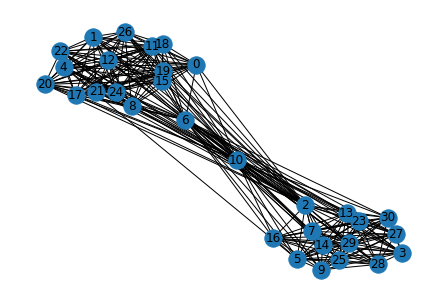

In [256]:
input_data = pd.read_csv('df_africa2_out.csv', index_col=0)
G = nx.Graph(input_data.values)
G.remove_edges_from(nx.selfloop_edges(G))
iso = list(nx.isolates(G))

nx.draw(G, with_labels='True')

NodeView((0, 1, 8, 11, 12, 14, 16, 18, 19, 20, 21, 22, 23, 25, 27, 5, 4, 2, 6, 10))

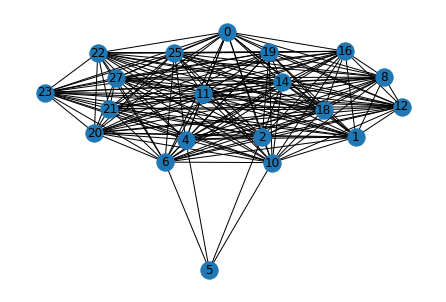

In [29]:
T = find_threshold_graph(G)
nx.draw(T, with_labels='True')
T.nodes

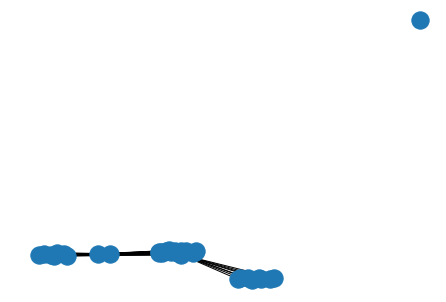

In [30]:
df3 = pd.read_csv('df_africa3_out.csv')

input_data = pd.read_csv('df_africa3_out.csv', index_col=0)
G = nx.Graph(input_data.values)
G.remove_edges_from(nx.selfloop_edges(G))

nx.draw(G)

NodeView((12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 31, 32, 33, 34, 35, 7, 26, 5, 4))

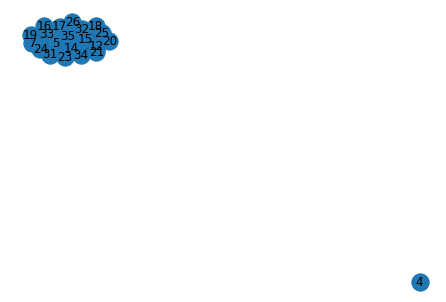

In [31]:
T = find_threshold_graph(G)
nx.draw(T, with_labels='True')
T.nodes

## The Network

In [50]:
import networkx as nx
G = nx.Graph()

for prov in df_africa['Province']:
    G.add_node(prov)
G.has_node('Tripolitania') 

True